In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import json
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import geopandas as gpd

In [5]:
solo_living = pd.read_csv('wards_household_data.csv')

In [6]:
solo_living.head()

,Region code,Region name,County code,County name,Local authority code,Local authority name,Ward code,Ward name,Unnamed: 8,Persons,Persons.1,Persons.2,Unnamed: 12,Hectares,Persons per hectare,Unnamed: 15,Households,Persons per household
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All usual residents,Household residents,Communal establishment residents,NaN,Area,Population density,NaN,Households with at least one usual resident,Average household size
1,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007955,Annfield Plain,NaN,"7,774","7,717",57,NaN,799,9.7,NaN,"3,522",2.2
2,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007956,Aycliffe East,NaN,"6,280","6,234",46,NaN,"1,336",4.7,NaN,"2,787",2.2
3,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007957,Aycliffe North,NaN,"7,751","7,611",140,NaN,337,23,NaN,"3,271",2.3
4,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007958,Aycliffe West,NaN,"7,457","7,457",0,NaN,288,25.9,NaN,"3,335",2.2


In [7]:
solo_living = solo_living.drop(solo_living.index[0])
solo_living.head()
solo_living['Persons per household'] = solo_living['Persons per household'].astype('float32')

In [8]:
len(solo_living)

8570

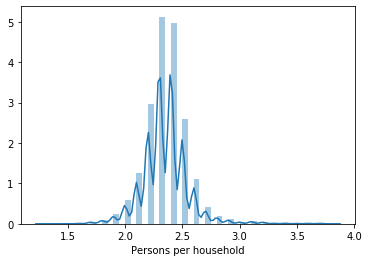

In [9]:
sns.distplot(solo_living['Persons per household'])

In [10]:
household_size = solo_living[['Ward code','Persons per household']].dropna()

In [11]:
data = pd.read_csv('All_data_aggregated_ward_level.csv')

In [12]:
list(data.columns)

['Unnamed: 0',
 'Unnamed: 0_x',
 'green_score',
 'GSS_CODE',
 'WD17CD',
 'GLUD_Area of Greenspace PCT',
 'LCM_grass_pct',
 'LCM_tree_pct',
 'LCM_urban_pct',
 'UA_Public Greenery PCT',
 'UA_Forests PCT',
 'StreetTrees_PCT',
 'Unnamed: 0.1',
 'borough_name_x',
 'poly',
 'area_m',
 'area_km',
 'gsview_point_list',
 'gsview_segnet_tags_dict',
 'gsview_tags',
 'total_gsview_pixels',
 'Tree',
 'TreeTotal',
 'TreeScore',
 'psoriasis_Prescriptions',
 'psoriasis_Prevalence',
 "Meniere's disease_Prescriptions",
 "Meniere's disease_Prevalence",
 "crohn's disease_Prescriptions",
 "crohn's disease_Prevalence",
 'gastroparesis_Prescriptions',
 'gastroparesis_Prevalence',
 'irritable bowel syndrome_Prescriptions',
 'irritable bowel syndrome_Prevalence',
 'parkinson_Prescriptions',
 'parkinson_Prevalence',
 'sleep apnea_Prescriptions',
 'sleep apnea_Prevalence',
 'interstitial cystitis_Prescriptions',
 'interstitial cystitis_Prevalence',
 'bipolar_Prescriptions',
 'bipolar_Prevalence',
 'hypothyroidis

In [23]:
df = pd.read_csv('Jan_clubcard2nutrients.csv.bz2', compression='bz2', header=0, sep=',', quotechar='"')

In [24]:
thresh_bottom_weight = np.mean(df['weight']) - 2*np.std(df['weight'])
thresh_top_weight = np.mean(df['weight']) + 2*np.std(df['weight'])

In [30]:
test = df[ (df['weight'] < 600) &  (df['weight'] > 100) ]
# test = df[ (df['weight'] < thresh_top_weight) & (df['weight'] > thresh_bottom_weight) ].copy()

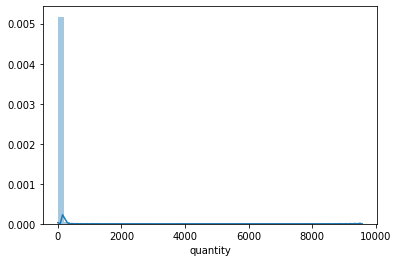

In [31]:
sns.distplot(test['quantity'])

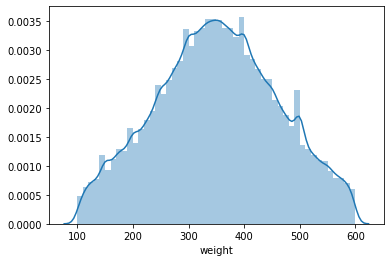

In [32]:
sns.distplot(test['weight'])

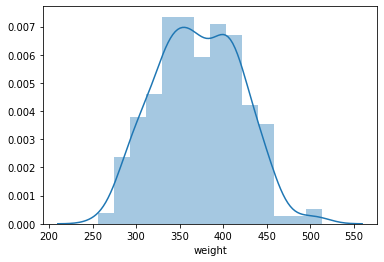

In [33]:
sns.distplot(data['weight'])

In [36]:
len(test)

754407

In [37]:
list(df.columns)

['pcd',
 'lat',
 'long',
 'oa11',
 'lsoa11',
 'msoa11',
 'osward',
 'oslaua',
 'clubcard_number',
 'weight',
 'volume',
 'energy_on_label',
 'g_fat',
 'g_saturate',
 'g_salt',
 'g_sugar',
 'g_protein',
 'g_carb',
 'g_fibre',
 'g_alcohol',
 'energy_fat',
 'energy_saturate',
 'energy_sugar',
 'energy_protein',
 'energy_carb',
 'energy_fibre',
 'energy_alcohol',
 'energy_tot',
 'f_energy_fat',
 'f_energy_saturate',
 'f_energy_sugar',
 'f_energy_protein',
 'f_energy_carb',
 'f_energy_fibre',
 'f_energy_alcohol',
 'hdi_fat',
 'hdi_saturate',
 'hdi_carb',
 'hdi_protein',
 'hdi_sugar',
 'energy_density',
 'h_nutrients_weight',
 'h_nutrients_weight_norm',
 'h_nutrients_calories',
 'h_nutrients_calories_norm',
 'beer_items',
 'dairy_items',
 'eggs_items',
 'fats_oils_items',
 'fish_items',
 'fruit_veg_items',
 'grains_items',
 'meat_red_items',
 'poultry_items',
 'readymade_items',
 'sauces_items',
 'soft_drinks_items',
 'spirits_items',
 'sweets_items',
 'tea_coffee_items',
 'water_items',
 'w

In [276]:
# household_individual = {'CardID':[] , 'WardCode': []  , 'h_nutrients_calories_norm' :[] , 'weight' : [] , 'volume':[]}
# for name, group in df.groupby('clubcard_number'):
#     household_individual['CardID'].append(name)
#     household_individual['WardCode'].append(group.iloc[0]['osward'])
#     household_individual['h_nutrients_calories_norm'].append(np.sum(group['h_nutrients_calories_norm']))
#     household_individual['weight'].append(np.sum(group['weight']))
#     household_individual['volume'].append(np.sum(group['volume']))
# Tesco = pd.Dataframe.from_dict(household_individual)
   

In [38]:
nutrient  = [
 'h_items_norm',
 'h_items_weight_norm',
 'h_nutrients_calories_norm']
Tesco = test[['clubcard_number','h_nutrients_calories_norm', 'volume','osward','f_energy_alcohol' , 'h_items_norm' , 'h_items_weight_norm']].copy()
Tesco = Tesco.dropna()
features_to_normalize = ['h_nutrients_calories_norm','h_items_norm','h_items_weight_norm']
Tesco[features_to_normalize] = Tesco[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [39]:
# Tesco['Household'] =  0.7283  + 0.26*Tesco['weight'] - 0.65*Tesco['h_nutrients_calories_norm']
# Tesco['Household'] =  3.2294 + 0.5422*Tesco['weight'] -1.3654*Tesco['h_nutrients_calories_norm']
# Tesco['Household'] =  3.2294 + 0.5422*Tesco['weight'] -1.3654*Tesco['h_nutrients_calories_norm']
# Tesco['Household'] =  0.7344 - 0.4772*Tesco['f_energy_alcohol'] + 0.4570*Tesco['h_items_norm'] -0.6621*Tesco['h_items_weight_norm']

Tesco['Household'] =  0.9230 + 0.3245*Tesco['h_items_norm'] -0.4821*Tesco['h_items_weight_norm'] -0.5849*Tesco['h_nutrients_calories_norm']

In [40]:
Tesco['Household']

0         0.374408
1         0.519845
2         0.465709
3         0.674827
4         0.502000
            ...   
886978    0.445009
886980    0.576313
886981    0.541422
886982    0.376781
886983    0.607516
Name: Household, Length: 754111, dtype: float64

In [55]:
thresh_bottom_household = np.mean(Tesco['Household']) - 2*np.std(Tesco['Household'])
thresh_top_household = np.mean(Tesco['Household']) + 2*np.std(Tesco['Household'])

Tesco_filtered = Tesco[ (Tesco['Household'] > thresh_bottom_household) &  (Tesco['Household'] < thresh_top_household) ].copy()

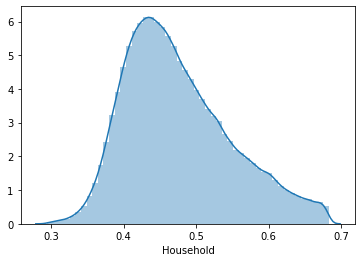

In [56]:
sns.distplot(Tesco_filtered['Household'])

In [109]:
Thresh  = np.min(Tesco_filtered['Household']) +  0.4 * (np.max(Tesco_filtered['Household']) - np.min(Tesco_filtered['Household']))
print(Thresh)

0.44987882743706237


In [110]:
def solo(x):
    if x<= Thresh:
        return 1
    else:
        return 0 
Tesco_filtered['solo'] = Tesco_filtered['Household'].apply(lambda x: solo(x))

In [111]:
np.sum(Tesco_filtered['solo'])

306299

In [112]:
np.sum(Tesco_filtered['solo'])/len(Tesco_filtered)

0.42514719884961427

In [113]:
Ward_level_estimate = {'WardCode':[] , 'Household':[]}
for name , group in Tesco_filtered.groupby('osward'):
    Ward_level_estimate['WardCode'].append(name)
    soloHouses = np.sum(group['solo'])
    fraction = float(soloHouses)/ len(group)
    Ward_level_estimate['Household'].append(fraction)
Ward_estimates = pd.DataFrame.from_dict(Ward_level_estimate)

In [114]:
len(Ward_estimates)

658

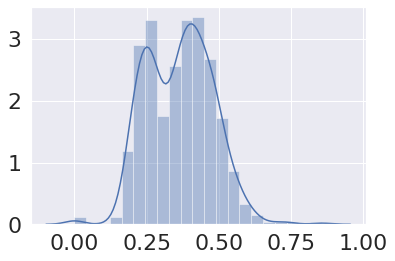

In [115]:
sns.distplot(Ward_level_estimate['Household'])

In [116]:
%store Ward_estimates

Stored 'Ward_estimates' (DataFrame)


In [117]:
wards_shape = gpd.read_file('../Data/Geo_Data/geo/london_wards.shp')
wards_shape.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Chessington South Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,52,733,50840,10884,E05000405,755.173,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
1,Tolworth and Hook Rise Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,106,734,117160,11407,E05000414,259.464,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30846 51.37586, -0.30834 51.37606..."
2,Berrylands Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,107,735,50449,11413,E05000401,145.390,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30385 51.39249, -0.30375 51.39252..."
3,Alexandra Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,108,736,50456,11420,E05000400,268.506,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.26990 51.38845, -0.26975 51.38838..."
4,Beverley Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,109,737,117161,11417,E05000402,187.821,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.24662 51.39921, -0.24672 51.39921..."


In [118]:
solo_shape = pd.merge(wards_shape , Ward_estimates , left_on='CODE' , right_on='WardCode')

In [119]:
len(solo_shape)

508

In [120]:
islingtonWards = ['E05000366',
 'E05000367',
 'E05000368',
 'E05000369',
 'E05000370',
 'E05000371',
 'E05000372',
 'E05000373',
 'E05000374',
 'E05000375',
 'E05000376',
 'E05000377',
 'E05000378',
 'E05000379',
 'E05000380',
 'E05000381']

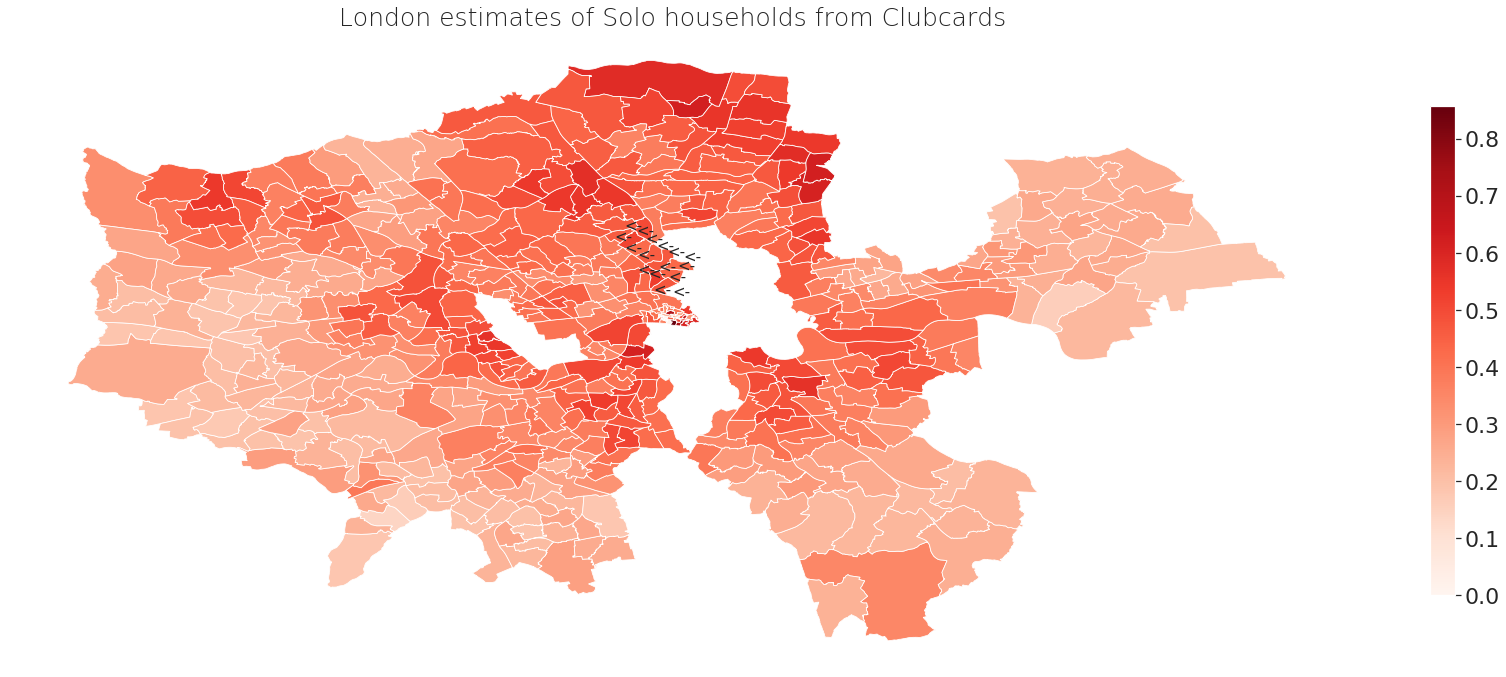

In [124]:
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
ax.axis('off')
ax.set_title('London estimates of Solo households from Clubcards ', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=solo_shape['Household'].min(), vmax=solo_shape['Household'].max()))
#empty array for the data range
sm._A = []
#add the colorbar to the figure
cbar = fig.colorbar(sm,shrink=0.3)
solo_shape.plot(ax=ax,column='Household', cmap='Reds', linewidth=0.8)


islington = solo_shape[solo_shape['CODE'].isin(islingtonWards)]
for x, y, label in zip(islington.geometry.centroid.x, islington.geometry.centroid.y, islington.NAME):
    ax.annotate('<-', xy=(x, y), xytext=(5, 5), textcoords="offset points",fontsize = 15)
# lowest = solo_shape[:5]
# highest = solo_shape[-5:]
# for x, y, label in zip(lowest.geometry.centroid.x, lowest.geometry.centroid.y, lowest.NAME):
#     ax.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points",fontsize = 15)
# for x, y, label in zip(highest.geometry.centroid.x, highest.geometry.centroid.y, highest.NAME):
#     ax.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points",fontsize = 15)